In [4]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=42)

In [5]:
# 平衡是通过随机的抽样来实现的
import scipy
import scipy.io as scio
import numpy as np
import os
# 读取训练和测试数据
data_root = '/data/file/classification_data/years/sum_2016/'
train_sumX_2016_norm = scio.loadmat(os.path.join(data_root, 'train_sumX_2016_norm.mat'))['X']
train_sumy_2016_label = scio.loadmat(os.path.join(data_root, 'train_sumy_2016_label.mat'))['y']

test_sumX_2016_norm = scio.loadmat(os.path.join(data_root, 'test_sumX_2016_norm.mat'))['X']
test_sumy_2016_label = scio.loadmat(os.path.join(data_root, 'test_sumy_2016_label.mat'))['y']


In [6]:
# 训练
eec.fit(train_sumX_2016_norm, train_sumy_2016_label)


/home/roczhang/anaconda3/envs/dataAna/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


EasyEnsembleClassifier(random_state=42)

In [7]:
y_pred = eec.predict(test_sumX_2016_norm)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0])

In [8]:
from sklearn.metrics import balanced_accuracy_score
eec.score(test_sumX_2016_norm, test_sumy_2016_label)

0.7321428571428571

In [9]:
balanced_accuracy_score(y_pred, test_sumy_2016_label)

0.7660818713450293

In [13]:
pos_prob_eec = eec.predict_proba(test_sumX_2016_norm)[:, 1]

pos_prob_eec

array([0.4772169 , 0.48976542, 0.47183124, 0.48086418, 0.49034344,
       0.47612863, 0.47027067, 0.44251055, 0.42537361, 0.47260111,
       0.47548594, 0.46740623, 0.48109356, 0.48744835, 0.47136725,
       0.47932675, 0.44658152, 0.45571988, 0.46634576, 0.4777619 ,
       0.49073426, 0.47412499, 0.48426222, 0.47425686, 0.45505161,
       0.47805634, 0.46357015, 0.4941708 , 0.47220386, 0.47721222,
       0.45307684, 0.4932785 , 0.49003648, 0.48371089, 0.4480103 ,
       0.48023593, 0.45611316, 0.53129876, 0.48149566, 0.51137177,
       0.47753271, 0.49191824, 0.47831963, 0.46178845, 0.48546167,
       0.48113843, 0.46070696, 0.46396865, 0.46677858, 0.47244967,
       0.52186386, 0.44633896, 0.52720436, 0.48713626, 0.4816954 ,
       0.50127771, 0.52077218, 0.50444423, 0.52253834, 0.49414737,
       0.49412802, 0.53044833, 0.51915533, 0.50576517, 0.52783672,
       0.5393994 , 0.51663399, 0.52768164, 0.49952895, 0.53677247,
       0.50646611, 0.48300426, 0.49003333, 0.49018243, 0.49905

In [14]:
def get_roc(pos_prob,y_true):

    pos = y_true[y_true==1]  # 145
    neg = y_true[y_true==0]  # 855
    # [::-1]逆序切片
    threshold = np.sort(pos_prob)[::-1]  # 按预测为正的概率大小逆序排列
    y = y_true[pos_prob.argsort()[::-1]]

    tpr_all = [0] ; fpr_all = [0]
    tpr = 0 ; fpr = 0
    x_step = 1/float(len(neg))  # 0.0011695906432748538
    y_step = 1/float(len(pos))  # 0.006896551724137931
    y_sum = 0
    for i in range(len(threshold)):  # 1000
        if y[i] == 1:
            tpr += y_step
            tpr_all.append(tpr)
            fpr_all.append(fpr)
        else:
            fpr += x_step
            fpr_all.append(fpr)
            tpr_all.append(tpr)
            y_sum += tpr             # fpr加一个样本，y_sum累计。计算面积
    return tpr_all,fpr_all,y_sum*x_step  # 获得总体TPR，FPR和相应的AUC

In [15]:
tpr, fpr, auc = get_roc(pos_prob_eec, test_sumy_2016_label)

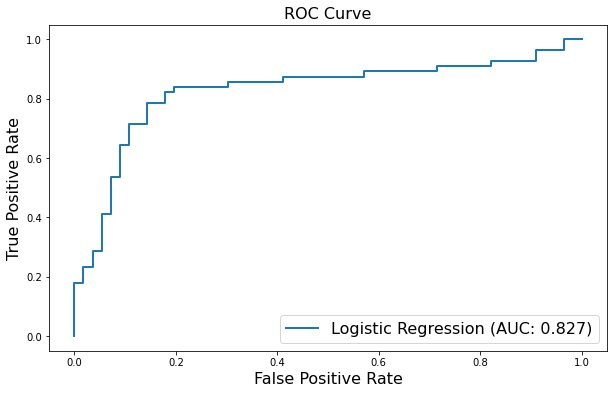

In [17]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,label="Logistic Regression (AUC: {:.3f})".format(auc),linewidth=2)
plt.xlabel("False Positive Rate",fontsize=16)
plt.ylabel("True Positive Rate",fontsize=16)
plt.title("ROC Curve",fontsize=16)
plt.legend(loc="lower right",fontsize=16)
plt.show()